# [scikit-learn](https://scikit-learn.org/stable/)

**scikit-learn** è una libreria che raccoglie molti algoritmi di machine learning per il linguaggio Python. Offre vari algoritmi di classificazione, regressione e clustering, tra cui k-means, PCA, alberi di decisione, etc.

In [ ]:
# L'opzione -y serve per accettare eventuali prompt del programma
# di installazione
import sys
!conda install scikit-learn -y --prefix {sys.prefix}

In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Kmeans

Per prima cosa proviamo ad applicare l'algoritmo di clustering $k$-means a dei dati che ora generiamo casualmente.

Generiamo delle nuvole di punti da discribuzioni normali bivariate

In [ ]:
a_x = np.random.normal(2, .5, 50)
a_y = np.random.normal(3, 1.2, 50)

b_x = np.random.normal(1, .3, 50)
b_y = np.random.normal(10, .8, 50)

Concateniamo i vettori contenenti ascisse e ordinate dei due gruppi

In [ ]:
x = np.concatenate([a_x, b_x])
y = np.concatenate([a_y, b_y])

E disegnamo uno scatter plot

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

Ora vogliamo importare un classe contenuta in `sklearn`, ma fino ad ora abbiamo sempre importato un intero modulo con il comando `import` (al più cambiandogli nome con `as`). È possibile invece importare solamente alcune classi o funzioni di un modulo tramite la sintassi 
```
from module import class
```

Importiamo quindi la classe KMeans dal sottomodulo cluster di sklearn. 

In [ ]:
from sklearn.cluster import KMeans

Questa classe permette di utilizzare l'algoritmo $k$-means senza dover scrivere codice da zero. Per esempio per prima cosa inizializziamo un modello che cercherà di raggruppare i dati in due clusters

In [ ]:
model = KMeans(n_clusters = 2,     # Numero di clusters
               init = 'random',    # Inizializzazione casuale dei centroidi
               random_state = 42)  # Impostazione del generatore
                                   # di numeri casuali per poter 
                                   # riprodurre i risultati

Impiliamo i vettori x e y lungo le colonne in modo da ottenere una matrice con 100 righe e due colonne

In [ ]:
X = np.stack([x, y], axis = 1)
X.shape
X[:5, :]

Dopodiché stimiamo il modello per ottenere le stima dei centroidi e dei clusters.

Tutti gli oggetti di sklearn posseggono un metodo `fit` che permette di stimare i parametri del modello sulla base dei dati. In questo caso poiché la cluster analysis fa parte dei metodi non supervisionati dobbiamo passare come argomento solo i dati `X` e non le etichette `y`.

In [13]:
model.fit(X)

KMeans(init='random', n_clusters=2, random_state=42)

Dopo l'allenamento possiamo accedere agli attributi `cluster_centers_` e `labels_` che restituiscono rispettivamente i centroidi dei vari gruppi e il vettore di assegnamento dei punti ai clusters.

In [14]:
model.cluster_centers_

array([[2.02410538, 2.89859137],
       [0.97802437, 9.90184002]])

In [15]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Plottiamo poi l'assegnamento ottenuto

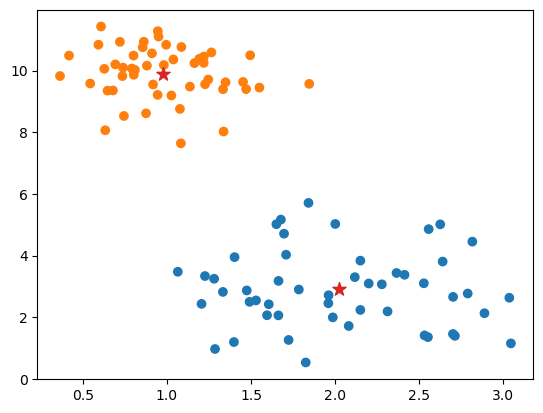

In [17]:
fig, ax = plt.subplots()
ax.scatter(x, y, c = [f"C{i}" for i in model.labels_])
ax.scatter(model.cluster_centers_[:, 0], 
           model.cluster_centers_[:, 1],
           marker = "*",
           color = "C3",
           s = 100)
plt.show()

L'attributo `inertia_` invece ritorna la somma delle varianze all'interno dei gruppi, quella che a lezione avete indicato con 
$$
\sum_{k=1}^K W(C_k)
$$

In [18]:
model.inertia_

128.32536550651878

Volendo invece raggruppare i dati in un solo gruppo, vediamo che tale valore aumenta considerevolmente

In [19]:
model1 = KMeans(n_clusters = 1,
                init = 'random',
                random_state = 42)

In [20]:
model1.fit(X)

KMeans(init='random', n_clusters=1, random_state=42)

In [21]:
model1.inertia_

1381.8197963576683

Avete visto che per $k$-means uno dei metodi con cui scegliere il numero ottimale di clusters è quello di cercare un gomito nel grafico delle varianze within in funzione del numero di clusters $K$

In [22]:
score = []
# Testiamo con K da 1 a 10
for k in range(1, 11):
    model = KMeans(n_clusters = k, 
                   random_state = 42)
    model.fit(X)
    score.append(model.inertia_)

In [23]:
df = pd.DataFrame({"k":range(1,11), "inertia": score})
df

,k,inertia
0,1,1381.819796
1,2,128.325366
2,3,80.858877
3,4,58.516399
4,5,41.221198
5,6,34.799086
6,7,31.006306
7,8,25.475754
8,9,22.024126
9,10,18.956515


Rappresentiamo i dati ottenuti

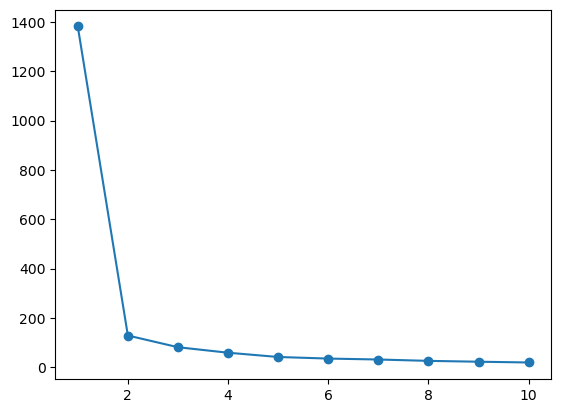

In [24]:
plt.figure()
plt.plot(df["k"], df["inertia"], marker = 'o')
plt.show()

È presente un gomito abbastanza evidente per $K=2$, come ci aspettavamo i dati possono essere raggruppati in due classi.

## PCA

Invece che generare i dati casulmente, sklearn mette a disposizione molti [dataset](https://scikit-learn.org/stable/datasets.html) famosi su cui fare pratica. Per esempio qui useremo il dataset "Wine recognition"

In [25]:
from sklearn.datasets import load_wine

In [26]:
data = load_wine()

In [27]:
type(data)

sklearn.utils._bunch.Bunch

L'oggetto `data` permette di accedere a un campo 'DESCR' (come fosse la chiave di un dizionario) contenente le informazioni sul dataset

In [28]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

Come in tutti i dataset se vi sono delle etichette sono accessibili nel campo 'target'. In questo caso i vini sono divisi in tre classi.

In [29]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [30]:
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Anche in questo caso potremmo cercare di raggruppare i vini sulla base delle 13 variabili misurate, tuttavia prima può essere interessante ridurre il numero di queste variabili con una PCA.

In [31]:
X = data['data']
y = data['target']

In [32]:
X.shape, y.shape

((178, 13), (178,))

In [33]:
dfx = pd.DataFrame(X, columns = data['feature_names'])
dfx

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [34]:
dfx.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Con il metodo describe notiamo che le scale di misura delle variabili sono piuttosto differenti fra loro, quindi prima di usare la PCA passiamo a standardizzare le colonne. Per standardizzare un DataFrame possiamo usare la classe `StandardScaler` di sklearn.

In [35]:
from sklearn.preprocessing import StandardScaler

Le classi tipo `StandardScaler` (e anche `PCA` come vedremo) oltre al metodo `fit` hanno anche il metodo `fit_transform` che oltre a calcolare i parametri restituisce anche i dati trasformati, in questo caso standardizzati.

In [36]:
scaler = StandardScaler()
Z = scaler.fit_transform(X)
Z

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [37]:
dfz = pd.DataFrame(Z, columns = data['feature_names'])
dfz.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


Bene ora siamo pronti per applicare la PCA

In [38]:
from sklearn.decomposition import PCA

Impostiamo l'attributo `n_components` a 13 per considerare tutte le variabili inizialmente.

In [39]:
pca = PCA(n_components = 13,
          random_state = 42)

Per stimare i parametri della PCA usiamo di nuovo il metodo `fit`.

In [40]:
pca.fit(Z)

PCA(n_components=13, random_state=42)

Per accedere alle varianze spiegate da ongni componente utilizziamo l'attributo `explained_variance_` del modello fittato.

In [41]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

Plottando questo vettore otteniamo lo *screeplot* che può essere usato come uno dei criteri con il quale selezionare il numero di componenti principali da mantenere.

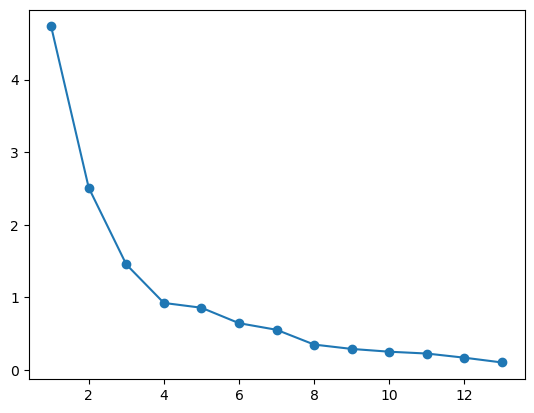

In [42]:
plt.figure()
plt.plot(range(1, 14), pca.explained_variance_, marker = "o")
plt.show()

Vediamo che, in questo caso, il gomito non è così evidente come loera nel caso precedente di $k$-means, tuttavia saremmo portati a tenere 4 componenti principali con questo criterio.

Se invece vogliamo la percentuale di varianza spiegata da ogni componente dobbiamo accedere a `explained_variance_ratio_`

In [43]:
exp = pca.explained_variance_ratio_
exp

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Tutte e 13 le variabili spiegato il 100% della varianza originale infatti

In [44]:
exp.sum()

1.0

Invece se volgiamo possiamo valutare la percentuale di varianza spiegata dalle prime $q$ componenti:

In [45]:
print(f"Le prime 2 componenti spiegano il {exp[:2].sum()*100:.2f}%")
print(f"Le prime 3 componenti spiegano il {exp[:3].sum()*100:.2f}%")
print(f"Le prime 4 componenti spiegano il {exp[:4].sum()*100:.2f}%")
print(f"Le prime 5 componenti spiegano il {exp[:5].sum()*100:.2f}%")

Le prime 2 componenti spiegano il 55.41%
Le prime 3 componenti spiegano il 66.53%
Le prime 4 componenti spiegano il 73.60%
Le prime 5 componenti spiegano il 80.16%


Quindi se vogliamo spiegare almeno il 70% della varianza originale dobbiamo trattenere 4 componenti, se invece vogliamo spiegarne almeno l'80% ne dobbiamo tenere 5.

Visto che i due metodi sono piuttosto in accordo, decidiamo di tenere 4 componenti. Stimiamo nuovamente il modello calcolando anche gli scores con il metodo `fit_transform`.

In [46]:
pca4 = PCA(n_components = 4, random_state = 42)
scores = pca4.fit_transform(Z)

In [47]:
scores.shape

(178, 4)

Analizziamo invece i loadings cui possiamo accedere con l'attributo `components_`

In [48]:
loadings = pca4.components_
loadings.round(2)

array([[ 0.14, -0.25, -0.  , -0.24,  0.14,  0.39,  0.42, -0.3 ,  0.31,
        -0.09,  0.3 ,  0.38,  0.29],
       [-0.48, -0.22, -0.32,  0.01, -0.3 , -0.07,  0.  , -0.03, -0.04,
        -0.53,  0.28,  0.16, -0.36],
       [-0.21,  0.09,  0.63,  0.61,  0.13,  0.15,  0.15,  0.17,  0.15,
        -0.14,  0.09,  0.17, -0.13],
       [-0.02,  0.54, -0.21,  0.06, -0.35,  0.2 ,  0.15, -0.2 ,  0.4 ,
         0.07, -0.43,  0.18, -0.23]])

Vediamo ora quali sono le variabile che hanno un valore del loading superiore in valore assoluto a 0.4. Ovvero le varibili cui le componenti principali sono maggiormente correlate.

In [52]:
heavy = (np.abs(loadings) >= 0.4)
heavy

array([[False, False, False, False, False, False,  True, False, False,
        False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
         True, False, False, False],
       [False, False,  True,  True, False, False, False, False, False,
        False, False, False, False],
       [False,  True, False, False, False, False, False, False, False,
        False,  True, False, False]])

In [53]:
(loadings >= 0.4).astype(int) - (loadings <= -0.4).astype(int)

array([[ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0]])

La prima componente è correlata positivamente a:

In [54]:
np.array(data['feature_names'])[heavy[0]]

array(['flavanoids'], dtype='<U28')

Mentre la seconda componente è correlata negativamente a:

In [56]:
np.array(data['feature_names'])[heavy[1]]

array(['alcohol', 'color_intensity'], dtype='<U28')

E così via

In [57]:
np.array(data['feature_names'])[heavy[2]]

array(['ash', 'alcalinity_of_ash'], dtype='<U28')

In [58]:
np.array(data['feature_names'])[heavy[3]]

array(['malic_acid', 'hue'], dtype='<U28')

Tuttavia molte correlazioni sono diverse da 0 anche se inferiori a 0.4, quindi queste componenti non sono di facile interpretazione. Una rotazione delle componenti potrebbe migliorare il risultato ma sklearn (a differenza di `R`) non implementa le rotazioni occorrerebbe un pacchetto specialistico che non vedremo.

Proviamo ora a usare solo due componenti anche se sappiamo che spiegano solo poco più del 50% della varianza totale. Questo poiché con due componenti possiamo rappresentare gli scores come punti nel piano.

In [59]:
pca2 = PCA(n_components = 2, random_state = 42)
scores = pca2.fit_transform(Z)
loadings = pca2.components_

In [62]:
scores[:5, ]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [60]:
(loadings >= 0.4).astype(int) - (loadings <= -0.4).astype(int)

array([[ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0]])

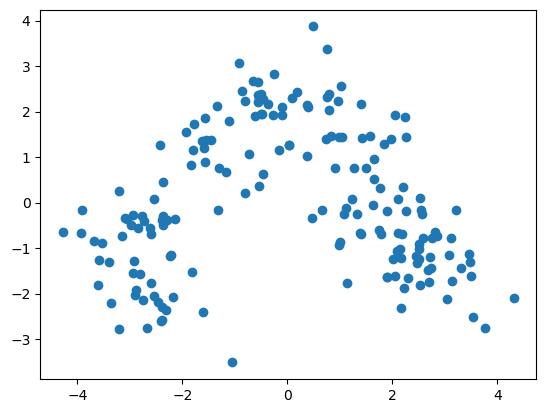

In [63]:
plt.figure()
plt.scatter(scores[:, 0], scores[:, 1])
plt.show()

Coloriamo sulla base delle etichette

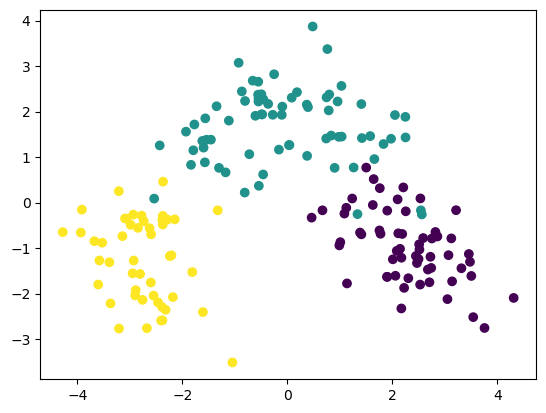

In [64]:
plt.figure()
plt.scatter(scores[:, 0], scores[:, 1], c = y)
plt.show()

Vediamo che nonstante le prime due componenti non spieghino molta della varianza e non siano granché interpretabili sono sufficienti da un punto di vista di clustering per raggruppare i vini nelle tre classi.

Proviamo di nuovo a usare $k$-means cercando 3 gruppi.

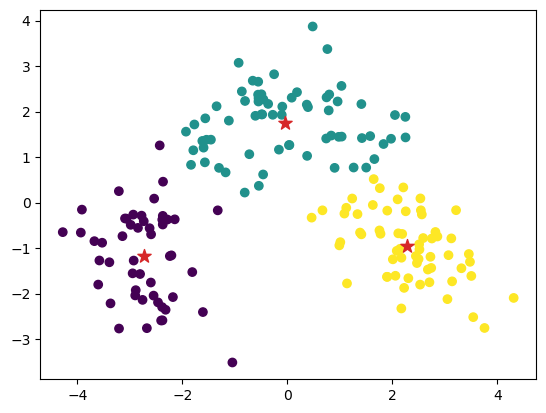

In [65]:
model = KMeans(n_clusters = 3, init = "random", random_state = 42)
model.fit(scores)

plt.figure()
plt.scatter(scores[:, 0], scores[:, 1], c = model.labels_)
plt.scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:, 1],
            marker = "*",
            color = "C3",
            s = 100)
plt.show()

Notiamo che i gruppi 0 e 2 sono scambiati nel risultato di $k$-means rispetto alle etichette originali. Tenendo presente questo fatto vediamo se ci sono dei punti che sono stati assegnati ad un cluster ma avevano un'etichetta diversa.

In [66]:
# Scambiamo le etichette dei cluster 0 e 2 
labels = np.array(model.labels_)
labels[labels == 0] = 3
labels[labels == 2] = 0
labels[labels == 3] = 2

# Calcoliamo i punti che sono stati assegnati al cluster che non corrisponde all'etichetta
errori = np.array([y[i] != labels[i] for i in range(len(labels))])

In [67]:
errori

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,

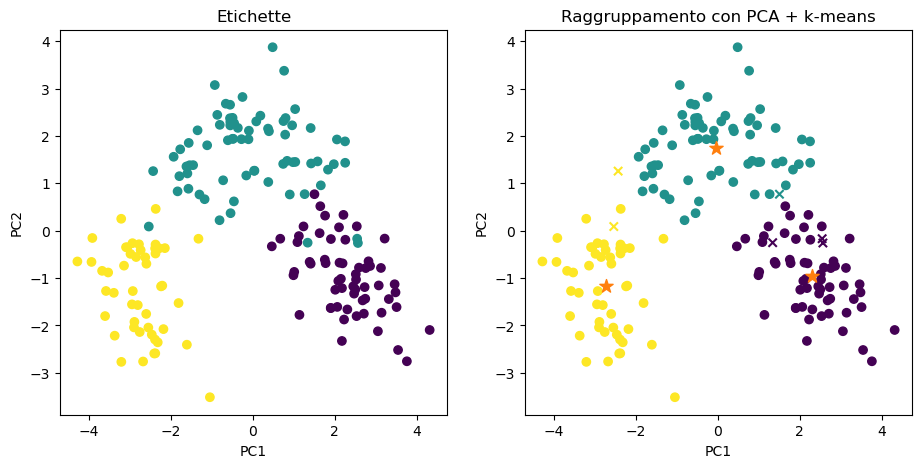

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (11, 5))

ax[0].scatter(scores[:, 0], scores[:, 1], c = y)
ax[0].set_title("Etichette")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")

ax[1].scatter(scores[errori == False, 0], scores[errori == False, 1], 
              c = labels[errori == False])
ax[1].scatter(scores[errori == True, 0], scores[errori == True, 1], 
              c = labels[errori == True], marker = "x")
ax[1].scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:, 1],
            marker = "*",
            color = "C1",
            s = 100)
ax[1].set_title("Raggruppamento con PCA + k-means")
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")
plt.show()

Abbiamo usato $k$-means e PCA per cercare di ricavare informazioni rigurado le etichette dei dati (gruppi dei vini), avete visto però che entrambe sono tecniche di apprendimento non supervisionato quindi non necessitano delle etichette. Questo esempio era solo per farvi vedere le due tecnice in gioco assieme ma questa tecnica non dovrebbe essere usata davvero per cercare di classificare i vini. Per questo sono più utili tecniche di apprendimento supervisionato come ad esempio gli alberi di decisione.